In [186]:
# Código adaptado em Jupyter Notebook com base nos materiais disponibilizados pelo professor, juntamente com exemplos do próprio TensorFlow. 
# O TensorFlow é uma biblioteca popular para aprendizado de máquina e pode ser encontrado na sua documentação oficial.

import csv
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.regularizers import l2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1024

Especifique cada caminho


In [187]:
dataset = 'model/gesture_sign_classifier/gesture_sign_history.csv'
model_save_path = 'model/gesture_sign_classifier/gesture_sign_classifier.keras'

Configuração do número de classificação

In [188]:
NUM_CLASSES = 36

Comprimento de entrada

In [189]:
TIME_STEPS = 966
DIMENSION = 4

Carregar dados de aprendizagem



In [190]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [191]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [192]:
# Dividindo os dados em 70% treino e 30% (teste + validação)
X_train, X_test_val, y_train, y_test_val = train_test_split(X_dataset, y_dataset, train_size=0.70, random_state=RANDOM_SEED)

# Dividindo os 30% em 15% validação e 15% teste
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=RANDOM_SEED)

# Exibindo a quantidade de dados em cada conjunto
print(f'Tamanho do conjunto de treino: {len(X_train)}')
print(f'Tamanho do conjunto de validação: {len(X_val)}')
print(f'Tamanho do conjunto de teste: {len(X_test)}')

Tamanho do conjunto de treino: 11774
Tamanho do conjunto de validação: 2523
Tamanho do conjunto de teste: 2523


Construção de modelo

In [193]:
use_lstm = False
model = None
# Adicionar mais camadas densas pode ajudar o modelo a aprender representações mais complexas.
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=RANDOM_SEED)),
    tf.keras.layers.Dropout(0.5, seed=RANDOM_SEED),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=RANDOM_SEED)),
    tf.keras.layers.Dropout(0.5, seed=RANDOM_SEED),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=RANDOM_SEED)),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
# model = tf.keras.models.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(1974, 1)),
#     tf.keras.layers.LSTM(128, return_sequences=True),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])
# model = tf.keras.models.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION , )),
#     tf.keras.layers.Dense(512, kernel_initializer=tf.keras.initializers.HeNormal(seed=RANDOM_SEED)),
#     tf.keras.layers.LeakyReLU(),
#     tf.keras.layers.Dropout(0.5, seed=RANDOM_SEED),
#     tf.keras.layers.Dense(256, kernel_initializer=tf.keras.initializers.HeNormal(seed=RANDOM_SEED)),
#     tf.keras.layers.LeakyReLU(),
#     tf.keras.layers.Dropout(0.5, seed=RANDOM_SEED),
#     tf.keras.layers.Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(seed=RANDOM_SEED)),
#     tf.keras.layers.LeakyReLU(),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])
# model = tf.keras.models.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
#     tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001), kernel_initializer=tf.keras.initializers.HeNormal(seed=RANDOM_SEED)),
#     tf.keras.layers.Dropout(0.5, seed=RANDOM_SEED),
#     tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001), kernel_initializer=tf.keras.initializers.HeNormal(seed=RANDOM_SEED)),
#     tf.keras.layers.Dropout(0.5, seed=RANDOM_SEED),
#     tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001), kernel_initializer=tf.keras.initializers.HeNormal(seed=RANDOM_SEED)),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])
# if use_lstm:
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
#         tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(10, activation='relu'),
#         tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
#     ])
# else:

# model = tf.keras.models.Sequential([
#         tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),        
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(256, activation='relu'),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(128, activation='relu'),
        
#         tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
#     ])

c:\Users\Guilherme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [194]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 512)            │     1,978,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,147,748 (8.19 MB)

 Trainable params: 2,147,748 (8.19 MB)

 Non-trainable params: 0 (0.00 B)

In [195]:
#Callback para checkpoint do modelo
cp_callback = tf.keras.callbacks.ModelCheckpoint(
  model_save_path, verbose=1, save_weights_only=False)

#Callback para parada antecipada
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [196]:
#Compilação do modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



Treinamento do modelo

In [197]:
model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/30
183/184 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2244 - loss: 2.8233
Epoch 1: saving model to model/gesture_sign_classifier/gesture_sign_classifier.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.2258 - loss: 2.8161 - val_accuracy: 0.7769 - val_loss: 0.7024
Epoch 2/30
183/184 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6357 - loss: 1.0224
Epoch 2: saving model to model/gesture_sign_classifier/gesture_sign_classifier.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6361 - loss: 1.0211 - val_accuracy: 0.8807 - val_loss: 0.3131
Epoch 3/30
183/184 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7628 - loss: 0.6280
Epoch 3: saving model to model/gesture_sign_classifier/gesture_sign_classifier.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7630 - loss: 0.6276 - val_accuracy: 0.9136 - val_loss: 0.2314
Epoch 4/30
183/184 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8371 - loss: 0.4612
Epoch 4: saving model to model/gesture_sign

In [198]:
# Carregamento do modelo salvo
model = tf.keras.models.load_model(model_save_path)

In [199]:
# Teste de inferência
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[1.8152274e-08 9.6622688e-01 9.5628580e-05 7.1189308e-04 9.0649664e-05
 2.9231887e-06 1.9479156e-08 2.2831282e-08 1.1972385e-08 1.1980707e-07
 2.4433523e-06 8.8666274e-09 8.7277760e-05 6.0096892e-07 4.8731425e-07
 6.2593728e-08 3.2299865e-06 2.4939023e-05 2.5295313e-08 1.5081312e-05
 2.1032781e-06 2.0258785e-04 3.9039245e-05 7.8042343e-05 1.1326087e-04
 1.8565730e-05 3.7816480e-07 2.6368993e-10 3.5588656e-08 6.1874047e-08
 4.9983782e-09 2.5373944e-07 6.0574668e-10 2.6085012e-04 7.9141131e-08
 3.2022282e-02]
1


Linhas mistas

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


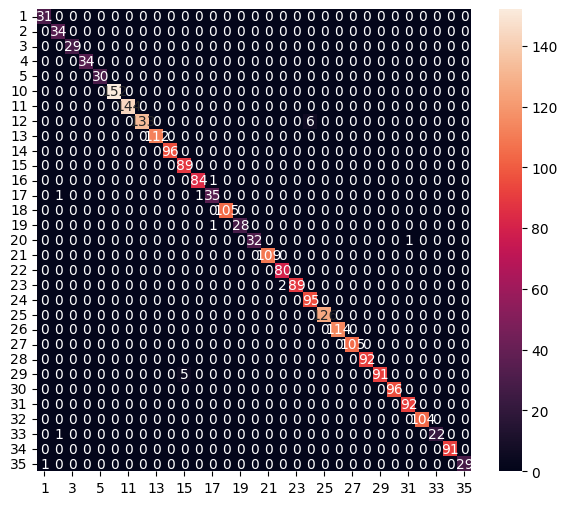

Classification Report
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       0.94      1.00      0.97        34
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        30
          10       1.00      1.00      1.00       152
          11       1.00      1.00      1.00       144
          12       1.00      0.96      0.98       139
          13       1.00      1.00      1.00       112
          14       1.00      1.00      1.00        96
          15       0.95      1.00      0.97        89
          16       0.99      0.99      0.99        85
          17       0.95      0.95      0.95        37
          18       1.00      1.00      1.00       105
          19       1.00      0.97      0.98        29
          20       1.00      0.97      0.98        33
          21       1.00      1.00      1.00       109
     

In [200]:
#O código abaixo foi adaptado a partir da seguinte resposta do Stack Overflow:
# Fonte: Stack Overflow Users. (2018). Stack Overflow. 
# Retrieved from https://stackoverflow.com/questions/50443411/how-to-load-a-tflite-model-in-script
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

Converter em modelo para Tensorflow-Lite

In [201]:
# Salvando como modelo apenas para inferência
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [202]:
tflite_save_path = 'model/gesture_sign_classifier/gesture_sign_classifier.tflite'

In [203]:
#Codigo adaptado a partir da documentação do tensoflow
#Fonte: MediaPipe Authors. (2020). MediaPipe Python (Version 2.0) [Source code]. Retrieved from https://www.tensorflow.org/lite/convert?hl=pt-br


# Exportar o modelo Keras para o formato de modelo salvo
model.export("saved_model")

# Converter o modelo salvo para TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()

# Salvar o modelo TensorFlow Lite em um arquivo
with open(tflite_save_path, "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3864), dtype=tf.float32, name='input_layer_8')
Output Type:
  TensorSpec(shape=(None, 36), dtype=tf.float32, name=None)
Captures:
  1750632715984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1750632717136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1750632718864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1750632715216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1750632720784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1750632720016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1750632718672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1750632721168: TensorSpec(shape=(), dtype=tf.resource, name=None)


Teste de raciocínio

In [204]:
# Inicialização do modelo TFLite
# Código alterado a partir de: https://www.tensorflow.org/lite/guide/inference?hl=pt-br#load_and_run_a_model_in_python
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [205]:
# Obter detalhes de entrada e saída
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer_8:0', 'index': 0, 'shape': array([   1, 3864]), 'shape_signature': array([  -1, 3864]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [206]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [207]:
%%time
# Realizar inferência
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1e+03 µs


In [208]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.81522068e-08 9.66226995e-01 9.56283184e-05 7.11892790e-04
 9.06495843e-05 2.92318896e-06 1.94790832e-08 2.28311965e-08
 1.19723405e-08 1.19806629e-07 2.44334569e-06 8.86659457e-09
 8.72777600e-05 6.00967212e-07 4.87312491e-07 6.25936067e-08
 3.22997425e-06 2.49389777e-05 2.52951686e-08 1.50812866e-05
 2.10327426e-06 2.02587486e-04 3.90392124e-05 7.80422779e-05
 1.13260772e-04 1.85657318e-05 3.78163747e-07 2.63688432e-10
 3.55885241e-08 6.18738127e-08 4.99835950e-09 2.53738733e-07
 6.05745620e-10 2.60849629e-04 7.91408397e-08 3.20222527e-02]
1
